***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* 3. [Positional Astronomy](3_0_Introduction.ipynb)
    * Previous: [3.2 Hour Angle (HA) and Local Sidereal Time (LST)](3_2_Hour_Angle.ipynb)
    * Next: [3.4 Direction Cosine Coordinates ($l,m,n$)](3_4_Direction_Cosine_Coordinates.ipynb) 

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [8]:
from IPython.display import HTML
HTML('../style/code_toggle.html')
import ephem
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


## 3.3 Horizontal Coordinates (ALT,AZ)

### 3.3.1 Basic definitions

In [$\S$ 3.2.1 &#10142;](3_2_Hour_Angle.ipynb#pos:sec:ha) we introduced the concept of an hour angle, which allows us to determine the time that still needs to elapse before a source crosses the local meridian. This however does not tell us where we should point a telescope on earth inorder to observe a source with a specific hour angle. The *horizontal coordinates* *azimuth* $\mathcal{A}$ and *altitude* $\mathcal{E}$ (elevation) is used to enable an observer on earth to locate celestial objects in the observer's local sky. The observer's horizontal plane is the fundamental plane of this coordinate system and is known as the *celestial horizon*. The azimuth angle is measured in the celestial horizon from due north towards the east, while the altitude of a celestial object is the angle between it and the celestial horizon. Both azimuth and elevation is measured in degrees. The azimuth and elevation angle is depicted in  [Fig. 3.3.1 &#10549;](#pos:fig:horizontal) <!--\ref{pos:fig:horizontal}--> 

<img src='figures/horizontal.svg' width=40%>

**Figure 3.3.1**: The horizontal coordinates.<a id='pos:fig:horizontal'></a> <!--\label{pos:fig:horizontal}-->

The equations below allow us to convert between equatorial and horizontal coordinates

<p class=conclusion>
  <font size=4><b> Converting between equatorial and horizontal </b></font>
  <br>
  <br>
\begin{eqnarray}
\cos\delta\cos H &=& \cos L_a\sin \mathcal{E} - \sin L_a\cos \mathcal{E}\cos \mathcal{A}\\
-\cos\delta\sin H&=& \cos \mathcal{E}\sin \mathcal{A}\\
\sin\delta &=& \sin L_a\sin \mathcal{E}+\cos L_a \cos \mathcal{E} \cos \mathcal{A} 
\end{eqnarray}
</p>

<div class=advice>
<b>Note:</b> In the conversion equations above $L_a$ denotes latitude (see <a href='3_1_Equatorial_Coordinates.ipynb'>$\S$ 3.1 &#10142;</a>).
</div>

The above equations were derived by applying the spherical trigonometric identities in [$\S$ 2.13 &#10142;](../2_Mathematical_Groundwork/2_13_Spherical_Trigonometry.ipynb) <!--\ref{math:sec:st}--> to 
the triangle $\Delta PSZ$ which is depicted in [Fig. 3.3.2 &#10549;](#pos:fig:conversion_alaz_radec) <!--\ref{pos:fig:conversion_alaz_radec}--> (see [Appendix &#10142;](../0_Introduction/2_Appendix.ipynb)).

<img src='figures/conversion.svg' width=40%>

**Figure 3.3.2**: The source-celestial pole-zenith triangle; which enables us to derive the conversion equations between horizontal and equatorial coordinates. The red plane represents the fundamental plane of the horizontal coordinate system, while the blue plane represents the 
fundamental plane of the celestial coordinate system. <a id='pos:fig:conversion_alaz_radec'></a> <!--\label{pos:fig:conversion_alaz_radec}-->

<div class=advice>
<b>Note:</b> The parallactic angle $q$ associated with a specific location on the celestial sphere $S$ is the angle between two great circles; the hour circle of $S$ and the great circle that passes through zenith and $S$. The parallactic angle $q$ is depicted in <a href='#pos:fig:conversion_alaz_radec'>Fig. 3.3.2 &#10549;</a>. <!--\ref{pos:fig:conversion_alaz_radec}--> 
The parallactic angle, and how it pertains to radio interferometry is discussed in more detail in <a href='../7_Observing_Systems/7_7_antenna_mounts_and_parallactic_angle.ipynb'>$\S$ 7.7 &#10142;</a>.
</div>

### 3.3.2 Examples

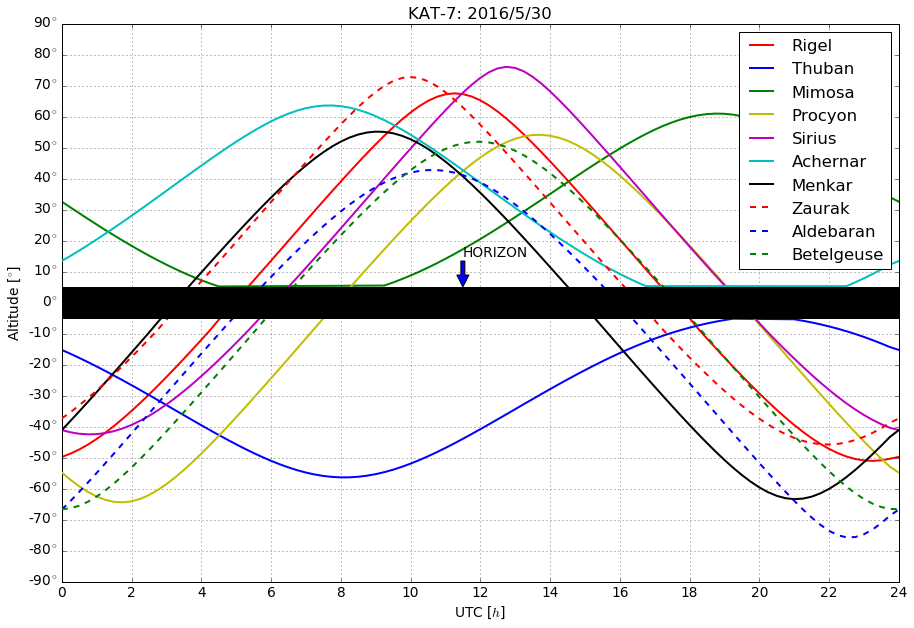

In [9]:
#Creating the observer: KAT-7
KAT7 = ephem.Observer() 
KAT7.lat = '-30:43:17'
KAT7.lon = '21:25:40.08'
KAT7.elevation = 0.0
KAT7.date = '2016/5/30 00:00:00' #UTC

#Creating the celestial bodies
star_names = np.array(["Rigel","Thuban","Mimosa","Procyon","Sirius","Achernar","Menkar","Zaurak","Aldebaran","Betelgeuse"])
star_objects = np.empty((len(star_names),),dtype=object)
for k in xrange(len(star_names)):
    star_objects[k] = ephem.star(star_names[k],KAT7) 


#Creating the time-strings at which we observe    
hours = np.empty((96,),dtype=object)
minutes = np.empty((96,),dtype=object)
alt_az_mat = np.zeros((len(star_names),len(hours)+1,2),dtype=float) #(sources,hours,horz_coord) 

hours_c = 0
for k in xrange(len(hours)):
   
    if k % 4 == 0:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       minutes[k] = "00"
    elif k % 4 == 1:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       minutes[k] = "15"
    elif k % 4 == 2:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       minutes[k] = "30"
    elif k % 4 == 3:
       if hours_c < 10:
          hours[k] = '0'+str(hours_c)
       else:
          hours[k] = str(hours_c)
       hours_c = hours_c + 1
       minutes[k] = "45"
        
#Compute the alt/az for different stars observed by KAT-7 and different times on 2016/5/30         
for k in xrange(len(hours)):
    
    #Set new time
    n_date = '2016/5/30 ' + hours[k] + ':' + minutes[k] + ':00'
    
    KAT7.date = n_date
    
    #Calculate new alt/az
    for j in xrange(len(star_names)):
        star_objects[j].compute(KAT7)
        alt_az_mat[j,k,0] = float(star_objects[j].alt)
        alt_az_mat[j,k,1] = float(star_objects[j].az)

#Copy first value to last value 
alt_az_mat[:,-1,:] = alt_az_mat[:,0,:]         
time_v = np.linspace(0,24,len(hours)+1,endpoint=True) 

#Plot alt
matplotlib.rcParams.update({'font.size': 13.75})

fig, ax = plt.subplots()

c = ["r","b","g","y","m","c","k"]
l = ["-","--"]
l_ind = 0
c_ind = 0

for k in xrange(len(star_names)):
    if c_ind == 7:
       c_ind = 0
       l_ind = 1
        
    mask = np.logical_not(np.logical_and(alt_az_mat[k,:,0]*(180/np.pi)>-5,alt_az_mat[k,:,0]*(180/np.pi)<5))
    new_curve_y = alt_az_mat[k,mask,0]*(180/np.pi) 
    new_curve_x = time_v[mask]
    ax.plot(new_curve_x,new_curve_y,c[c_ind]+l[l_ind],label=star_names[k],lw=2,zorder=k)
    
    c_ind = c_ind +1


ax.fill_between(time_v, -5, 5, facecolor='k',alpha=1,zorder=k+1)
ax.annotate("HORIZON", xy = (11.5,5), xytext=(11.5, 15),arrowprops=dict(facecolor="b", shrink=1))
ax.legend()
ax.set_xlim([0,24])
ax.set_ylim([-90,90])
ticks = np.array([-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90])
plt.yticks(ticks)
ticks = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xticks(ticks)
plt.xlabel("UTC [$h$]")
plt.ylabel("Altitude [$^{\circ}$]")
plt.title("KAT-7: 2016/5/30")

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(["-90$^{\circ}$","-80$^{\circ}$","-70$^{\circ}$","-60$^{\circ}$","-50$^{\circ}$","-40$^{\circ}$","-30$^{\circ}$","-20$^{\circ}$","-10$^{\circ}$","0$^{\circ}$","10$^{\circ}$","20$^{\circ}$","30$^{\circ}$","40$^{\circ}$","50$^{\circ}$","60$^{\circ}$","70$^{\circ}$","80$^{\circ}$","90$^{\circ}$"])
ax.set_yticklabels(labels)

ax.grid('on')

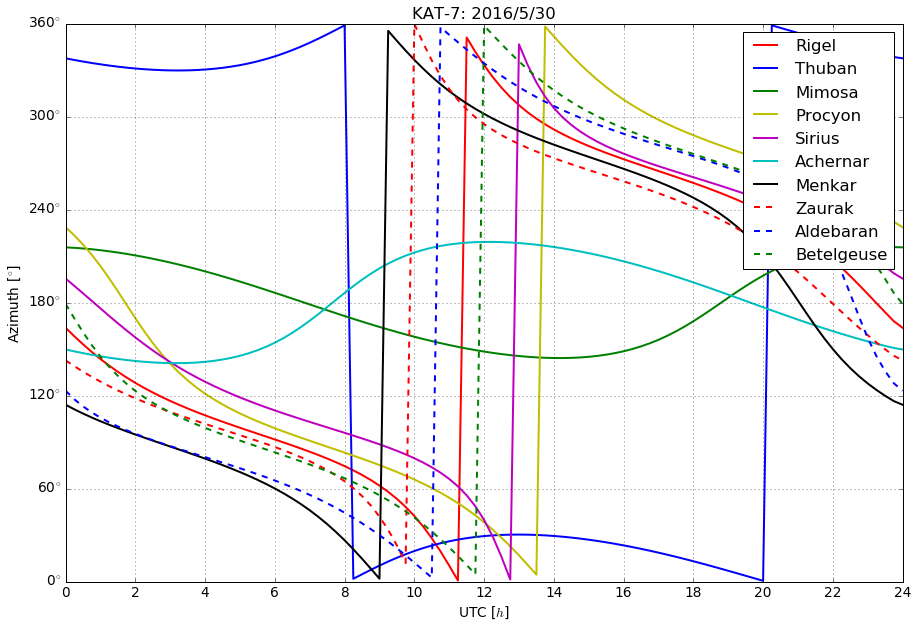

In [10]:
#Plot az
matplotlib.rcParams.update({'font.size': 13.75})
fig, ax = plt.subplots()

c = ["r","b","g","y","m","c","k"]
l = ["-","--"]
l_ind = 0
c_ind = 0

for i in xrange(10):
    if c_ind == 7:
       c_ind = 0
       l_ind = 1
    plt.plot(time_v,alt_az_mat[i,:,1]*(180/np.pi),c[c_ind]+l[l_ind],lw=2,label=star_names[i])
    c_ind = c_ind +1
    
ax.legend()
ax.set_xlim([0,24])
ax.set_ylim([0,360])
ticks = np.array([0,60,120,180,240,300,360])
plt.yticks(ticks)
ticks = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.xticks(ticks)
plt.xlabel("UTC [$h$]")
plt.ylabel("Azimuth [$^{\circ}$]")
plt.title("KAT-7: 2016/5/30")

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(["0$^{\circ}$","60$^{\circ}$","120$^{\circ}$","180$^{\circ}$","240$^{\circ}$","300$^{\circ}$","360$^{\circ}$"])
ax.set_yticklabels(labels)

ax.grid('on')

***

Next: [3.4 Direction Cosine Coordinates ($l,m,n$)](3_4_Direction_Cosine_Coordinates.ipynb) 